In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:

def load_images_and_labels(data_dir):
    images = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None: 
                img = cv2.resize(img, (150, 150)) 
                images.append(img)
                labels.append(category)
            else:
                print(f"Warning: Unable to read image {img_path}")
    return np.array(images), np.array(labels)


train_dir = r"C:\Users\Saurabh Raj\jupiterNotebook\intel-image-classification\seg_train\seg_train"
test_dir = r"C:\Users\Saurabh Raj\jupiterNotebook\intel-image-classification\seg_test\seg_test"


X_train, y_train = load_images_and_labels(train_dir)
X_test, y_test = load_images_and_labels(test_dir)

X_train = X_train / 255.0
X_test = X_test / 255.0

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Train data shape: (14034, 150, 150, 3)
Test data shape: (3000, 150, 150, 3)


In [3]:
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

y_test_enc = []
for label in y_test:
    if label in le.classes_:
        y_test_enc.append(le.transform([label])[0])
    else:
        print(f"Warning: '{label}' is not in the training labels, skipping.")
y_test_enc = np.array(y_test_enc)

def extract_hog_features(images):
    hog_features = []
    for img in images:
        img = (img * 255).astype(np.uint8)  # Convert float image back to uint8
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hog_feat = hog(gray_img, pixels_per_cell=(16, 16))
        hog_features.append(hog_feat)
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

X_train_hog, X_val_hog, y_train_enc, y_val_enc = train_test_split(X_train_hog, y_train_enc, test_size=0.1, random_state=42)

print("Training labels:", le.classes_)
print("Unique labels in training data:", np.unique(y_train))
print("Unique labels in test data:", np.unique(y_test))



Training labels: ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Unique labels in training data: ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Unique labels in test data: ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

nb = GaussianNB()
nb.fit(X_train_hog, y_train_enc)
y_pred_nb = nb.predict(X_val_hog)

accuracy_nb = accuracy_score(y_val_enc, y_pred_nb)
precision_nb = precision_score(y_val_enc, y_pred_nb, average='weighted')
recall_nb = recall_score(y_val_enc, y_pred_nb, average='weighted')
f1_nb = f1_score(y_val_enc, y_pred_nb, average='weighted')
cm_nb = confusion_matrix(y_val_enc, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")


Naive Bayes Accuracy: 0.6545584045584045


In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_hog, y_train_enc)
y_pred_dt = dt.predict(X_val_hog)

accuracy_dt = accuracy_score(y_val_enc, y_pred_dt)
precision_dt = precision_score(y_val_enc, y_pred_dt, average='weighted')
recall_dt = recall_score(y_val_enc, y_pred_dt, average='weighted')
f1_dt = f1_score(y_val_enc, y_pred_dt, average='weighted')
cm_dt = confusion_matrix(y_val_enc, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")


Decision Tree Accuracy: 0.48148148148148145


In [6]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_hog, y_train_enc)
y_pred_svm = svm.predict(X_val_hog)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

unique_classes = np.unique(y_train_enc)
print("Unique classes in training data:", unique_classes)

if len(unique_classes) < 2:
    print("Error: Insufficient classes for SVM training. Found only", len(unique_classes), "class(es).")
else:
    svm = SVC(probability=True, random_state=42)
    svm.fit(X_train_hog, y_train_enc)
    y_pred_svm = svm.predict(X_val_hog)

    accuracy_svm = accuracy_score(y_val_enc, y_pred_svm)
    precision_svm = precision_score(y_val_enc, y_pred_svm, average='weighted', zero_division=0)
    recall_svm = recall_score(y_val_enc, y_pred_svm, average='weighted', zero_division=0)
    f1_svm = f1_score(y_val_enc, y_pred_svm, average='weighted', zero_division=0)
    cm_svm = confusion_matrix(y_val_enc, y_pred_svm)

    print(f"SVM Accuracy: {accuracy_svm}")
    print(f"SVM Precision: {precision_svm}")
    print(f"SVM Recall: {recall_svm}")
    print(f"SVM F1 Score: {f1_svm}")
    print("Confusion Matrix:\n", cm_svm)

accuracy_svm = accuracy_score(y_val_enc, y_pred_svm)
precision_svm = precision_score(y_val_enc, y_pred_svm, average='weighted')
recall_svm = recall_score(y_val_enc, y_pred_svm, average='weighted')
f1_svm = f1_score(y_val_enc, y_pred_svm, average='weighted')
cm_svm = confusion_matrix(y_val_enc, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")


Unique classes in training data: [0 1 2 3 4 5]
SVM Accuracy: 0.7727920227920227
SVM Precision: 0.7743517522033422
SVM Recall: 0.7727920227920227
SVM F1 Score: 0.7729773994777547
Confusion Matrix:
 [[180   5   3   3   2  21]
 [  5 210   6   0   0   7]
 [  7   6 148  50  15   0]
 [  3   1  60 172  30   1]
 [ 10   0  24  21 176   1]
 [ 26   6   3   1   2 199]]
SVM Accuracy: 0.7727920227920227


           Model  Accuracy  Precision    Recall  F1-Score
0    Naive Bayes  0.654558   0.654426  0.654558  0.652065
1  Decision Tree  0.481481   0.480830  0.481481  0.480978
2            SVM  0.772792   0.774352  0.772792  0.772977


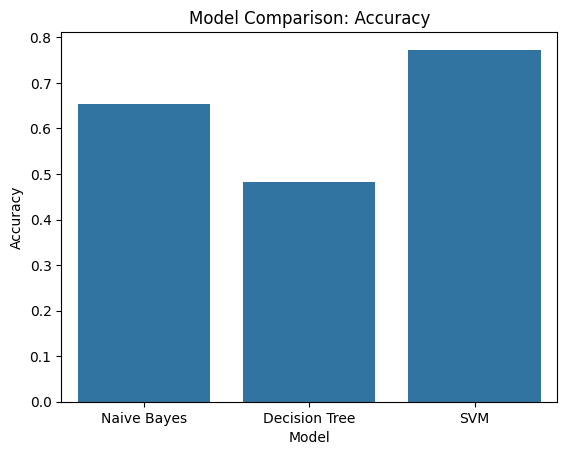

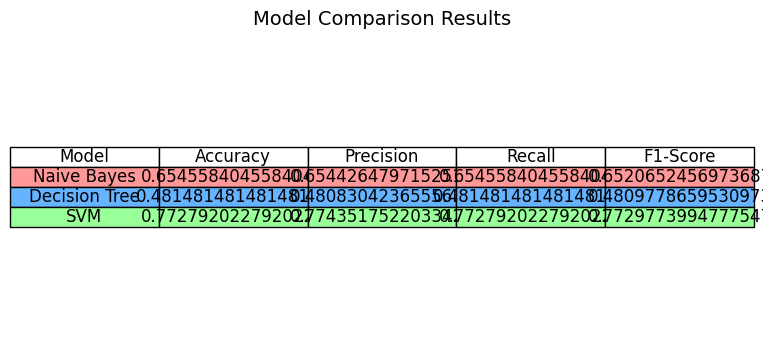

C:\Users\Saurabh Raj\AppData\Local\Temp\ipykernel_3540\555565722.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Set2')


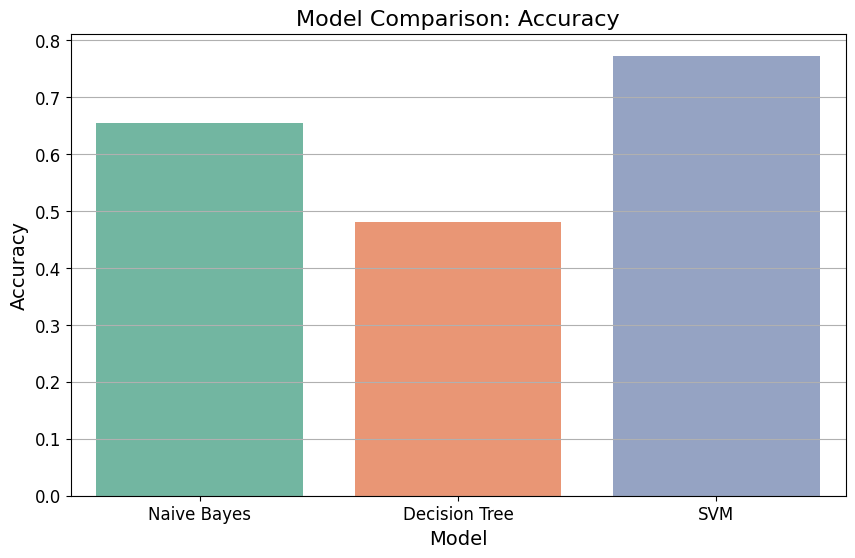

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

results = {
    'Model': ['Naive Bayes', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy_nb, accuracy_dt, accuracy_svm],
    'Precision': [precision_nb, precision_dt, precision_svm],
    'Recall': [recall_nb, recall_dt, recall_svm],
    'F1-Score': [f1_nb, f1_dt, f1_svm]
}

results_df = pd.DataFrame(results)

print(results_df)

sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison: Accuracy')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

results = {
    'Model': ['Naive Bayes', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy_nb, accuracy_dt, accuracy_svm],
    'Precision': [precision_nb, precision_dt, precision_svm],
    'Recall': [recall_nb, recall_dt, recall_svm],
    'F1-Score': [f1_nb, f1_dt, f1_svm]
}

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(8, 4)) 

ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False) 
table.set_fontsize(12)
table.scale(1.2, 1.2)

colors = ['#FF9999', '#66B3FF', '#99FF99']  # List of colors for each row
for i, color in enumerate(colors):
    for j in range(len(results_df.columns)):
        table[(i + 1, j)].set_facecolor(color)

# Show the colorful table
plt.title('Model Comparison Results', fontsize=14)
plt.show()

# Plot colorful bar comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Set2')
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Show the bar plot
plt.show()
